In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [168]:
import matplotlib.pyplot as plt
from PFNExperiments.LatentFactorModels.GenerativeModels.Clustering.GMMs import make_gmm_program_univariate, make_gmm_program_univariate_batched

In [45]:
from PFNExperiments.LatentFactorModels.GenerativeModels.LatenFactorModel_abstract import return_only_x
from PFNExperiments.LatentFactorModels.ComparisonModels.Hamiltionian_MC import Hamiltionian_MC

from PFNExperiments.LatentFactorModels.ComparisonModels.MakeDefaultListComparison import make_default_list_comparison,make_reduced_list_comparison

In [106]:
pprogram = make_gmm_program_univariate(
    dirichlet_beta = 1.0,
    lambda1= 10.0
    )

In [107]:
r = pprogram(
)

In [108]:
r

{'phi': tensor([0.2714, 0.2801, 0.4485]),
 'mu': tensor([ -3.7376, -10.2377,   1.3009]),
 'sigma_squared': tensor([0.2416, 0.6708, 0.2905]),
 'z': tensor([2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 0, 2, 0, 2, 0, 2,
         2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 2,
         2, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2,
         0, 2, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 0, 1,
         2, 0, 2, 2]),
 'x': tensor([  1.2421, -10.1121,   0.7347,   1.8186, -10.5914,   1.2967,   1.3179,
           1.1049,   1.7887, -10.4854, -10.2776,  -4.0348,  -9.7878,   1.1806,
          -9.4964,  -3.8782, -11.3971,   0.8229,  -4.0212,   1.6325,  -3.9693,
           1.4352,  -3.3122,   1.6680,   1.6882,  -3.6907, -10.3393,   1.4547,
          -3.6952, -10.5360,   1.4411,  -3.2593,  -9.5932,   0.8802, -10.5605,
          -3.8461,   1.4158, -10.4125,   1.0498,   1.4239, -10.3679,   1.6434,
          -3.3925,  -3.7255,

(array([ 1.,  4., 10.,  5.,  3.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  8., 18.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  6., 12., 23.]),
 array([-11.39714527, -10.95662117, -10.51609802, -10.07557392,
         -9.63504982,  -9.19452572,  -8.75400257,  -8.31347847,
         -7.87295437,  -7.43243074,  -6.99190664,  -6.55138302,
         -6.11085892,  -5.67033529,  -5.22981119,  -4.78928757,
         -4.34876394,  -3.90823984,  -3.46771598,  -3.02719212,
         -2.58666825,  -2.14614439,  -1.70562065,  -1.26509678,
         -0.82457292,  -0.38404909,   0.05647475,   0.49699861,
          0.93752247,   1.37804627,   1.81857014]),
 <BarContainer object of 30 artists>)

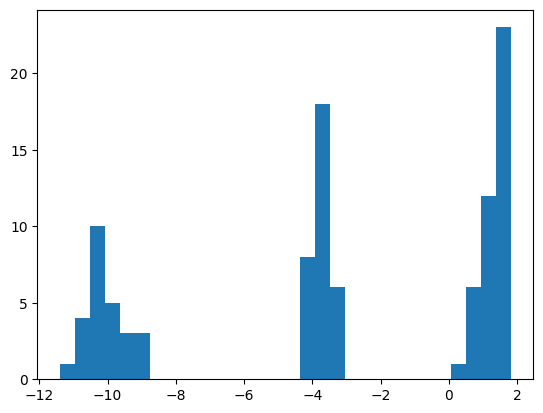

In [158]:
x = r['x']

plt.hist(x, bins = 30)

In [159]:
pprogram_return_only_x = return_only_x(pprogram)

In [146]:
models = make_default_list_comparison(pprogram= pprogram_return_only_x, n_samples= 1000)

model_list = {
        #"hmc_sampler": models[0],
        #"vi_diag": models[1],
        "vi_multivariate_normal": models[2],
        #"vi_laplace": models[3],
        #"vi_autoIAF": models[4],
        "vi_autostrucured": models[5],
}

In [147]:
samples_per_model = {}

for name, model in model_list.items():
    samples_per_model[name] = model.sample_posterior(x = x)

c:\Users\arik_\Documents\Dokumente\Job_Clausthal\PFNs\Repository\PFNExperiments\.conda\lib\site-packages\pyro\util.py:303: UserWarning: Found vars in model but not guide: {'phi', 'z'}
  warnings.warn(f"Found vars in model but not guide: {bad_sites}")


....................
....................


In [148]:
r["mu"], r["sigma_squared"]

(tensor([ -3.7376, -10.2377,   1.3009]), tensor([0.2416, 0.6708, 0.2905]))

In [149]:
x

tensor([  1.2421, -10.1121,   0.7347,   1.8186, -10.5914,   1.2967,   1.3179,
          1.1049,   1.7887, -10.4854, -10.2776,  -4.0348,  -9.7878,   1.1806,
         -9.4964,  -3.8782, -11.3971,   0.8229,  -4.0212,   1.6325,  -3.9693,
          1.4352,  -3.3122,   1.6680,   1.6882,  -3.6907, -10.3393,   1.4547,
         -3.6952, -10.5360,   1.4411,  -3.2593,  -9.5932,   0.8802, -10.5605,
         -3.8461,   1.4158, -10.4125,   1.0498,   1.4239, -10.3679,   1.6434,
         -3.3925,  -3.7255,   1.6795, -10.5064,  -9.9335,   0.7748,   1.3567,
         -3.6849,  -4.0689,  -3.7673,  -3.4568,   1.0520, -10.1620, -10.9015,
         -3.5948,   1.7011,  -9.6445,  -8.9354,   0.8933,   1.3949,  -3.3798,
         -3.8665,  -3.3954,   0.4235,   1.6872,   1.6183,   1.3061,  -3.8106,
        -10.4691,   0.8630,  -4.1168,   1.5701,  -3.6364,  -3.7066,   1.5081,
          1.5720,  -4.0288,  -9.1292,  -9.7107,  -3.8598,   1.2282,  -4.1971,
         -3.8721,   1.3934,  -3.5432,  -8.7963,  -3.5854, -10.35

In [160]:
model = Hamiltionian_MC(
    pprogram=pprogram_return_only_x,
    n_samples=500,
    n_warmup=500
)

In [161]:
samples = model.sample_posterior(x = x)

Sample: 100%|██████████| 1000/1000 [01:17, 12.86it/s, step size=6.35e-01, acc. prob=0.913]


In [162]:
r["mu"]

tensor([ -3.7376, -10.2377,   1.3009])

In [163]:
samples.keys()

dict_keys(['mu', 'phi', 'sigma_squared'])

In [164]:
samples["mu"].median(dim = 0)

torch.return_types.median(
values=tensor([ -3.7375, -10.0621,   1.3357]),
indices=tensor([190,  74, 185]))

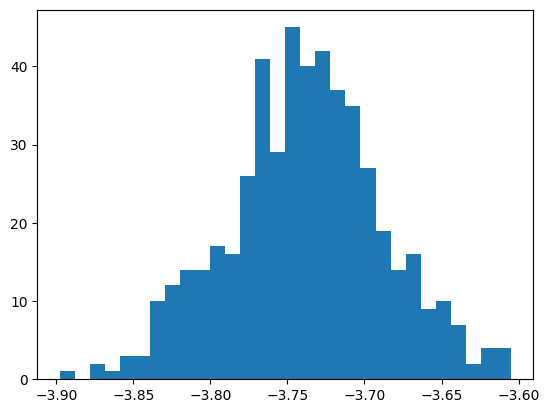

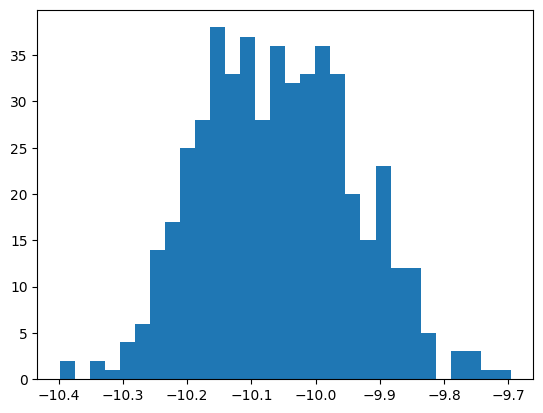

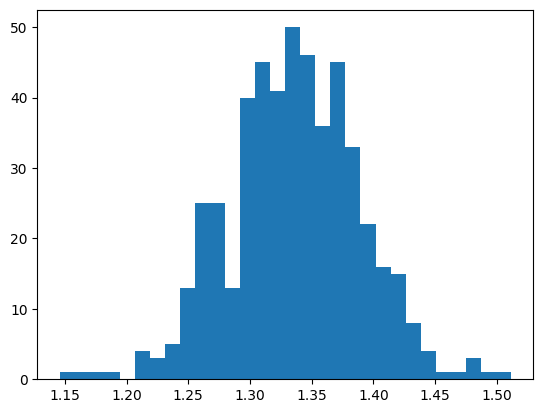

In [165]:
for dim in range(3):
    plt.hist(samples["mu"][:,dim].numpy(), bins = 30)
    plt.show()

In [166]:
r["sigma_squared"]

tensor([0.2416, 0.6708, 0.2905])

In [167]:
samples["sigma_squared"].median(dim = 0)

torch.return_types.median(
values=tensor([0.2776, 0.6129, 0.3387]),
indices=tensor([115, 279, 453]))

In [209]:
pprogram_batched = make_gmm_program_univariate_batched(
    dirichlet_beta = 1.0,
    lambda1= 10.0
    )

In [210]:
samples_batched = pprogram_batched()

torch.Size([100, 1000]) torch.Size([100, 1000])


In [211]:
samples_batched["x"].shape

torch.Size([100, 1000])